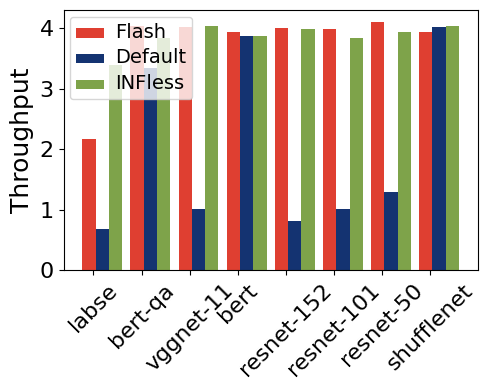

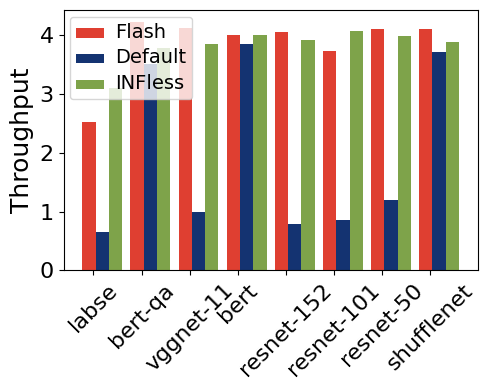

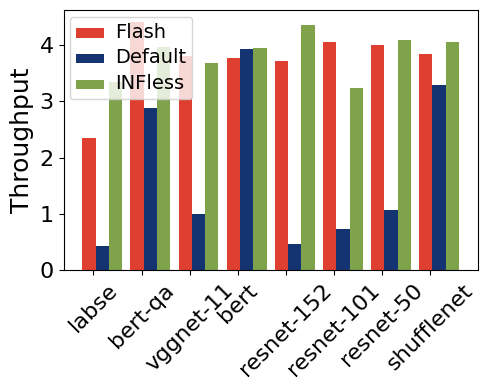

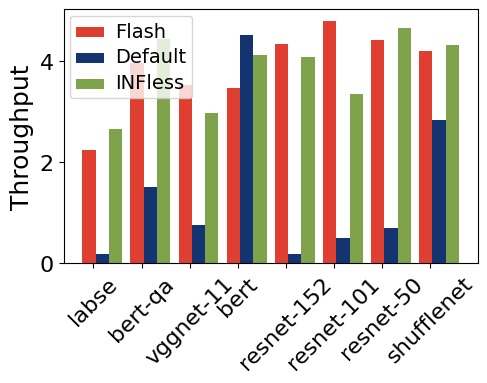

In [141]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
model_timestamps = {
    "labse": [1695019397, 1695144132, 1695290860],
    "bert-qa": [1695238221, 1695283039, 1695294389],
    "vggnet-11": [1695241700, 1695130532, 1695297955],
    "bert": [1695245496, 1695279460, 1695301807],
    "resnet-152":[1695249276,1695121357,1695305355],
    "resnet-101":[1695252824,1695116824,1695308835],
    "resnet-50":[1695256342,1695111942,1695312819],
    "shufflenet":[1695259836,1695271992,1695316225]
}
labels = ['Flash', 'Default','INFless']
methods = ['FlashScheduler', 'DefaultScheduler', 'INFlessScheduler']
colors=['#df3f31','#143371','#7ea34a']  
CVs = [1, 2, 4, 8]

for cv in CVs:
    width = 0.276
    x = np.arange(len(model_timestamps))

    fig, ax = plt.subplots(figsize=(5, 4))

    for i, method in enumerate(methods):
        method_throughputs = []  # 存储每个模型的吞吐量

        for modelname, timestamps in model_timestamps.items():
            timestamp = timestamps[i]
            csv = pd.read_csv(f'/home/flash/evaluation/metrics/cvd/{modelname}-fwm/{method}/{timestamp}/{cv}/{modelname}-fwm.csv')

            # Filter rows where 'StatusCode' is 200
            csv = csv[csv['StatusCode'] == 200]

            num_rows_csv = len(csv)

            
            throughput = num_rows_csv/ ((csv.iloc[-1]['ResponseTime'] - csv.iloc[0]['RequestTime']) / 1e9)
            
            method_throughputs.append(throughput)
        ax.bar(x + i * width, method_throughputs, width=width, label=labels[i], color=colors[i])

    # ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel('Throughput', fontsize=18)
    ax.set_xticks(x + width / 3)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xticklabels(model_timestamps.keys(), rotation=45,fontsize=16)
   
    ax.legend()
    legend = ax.legend()
    for item in legend.texts:
        item.set_fontsize(14)  # You can adjust the font size as needed
    plt.tight_layout()
    plt.savefig(f'CV_{cv}_inference.pdf', dpi=100)
    plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
model_timestamps = {
    "labse": [1695019397, 1695144132, 1695290860],
    "bert-qa": [1695238221, 1695283039, 1695294389],
    "vggnet-11": [1695241700, 1695130532, 1695297955],
    "bert": [1695245496, 1695279460, 1695301807],
    "resnet-152":[1695249276,1695121357,1695305355],
    "resnet-101":[1695252824,1695116824,1695308835],
    "resnet-50":[1695256342,1695111942,1695312819],
    "shufflenet":[1695259836,1695271992,1695316225]
}
labels = ['Flash', 'Default','INFless']
methods = ['FlashScheduler', 'DefaultScheduler', 'INFlessScheduler']
colors=['#df3f31','#143371','#7ea34a']  
CVs = [1, 2, 4, 8]

for cv in CVs:
    width = 0.2
    x = np.arange(len(model_timestamps))

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, method in enumerate(methods):
        method_throughputs = []  # 存储每个模型的吞吐量

        for modelname, timestamps in model_timestamps.items():
            timestamp = timestamps[i]
            csv = pd.read_csv(f'/home/flash/evaluation/metrics/cvd/{modelname}-fwm/{method}/{timestamp}/{cv}/{modelname}-fwm.csv')

            # Filter rows where 'StatusCode' is 200
            csv = csv[csv['StatusCode'] == 200]

            num_rows_csv = len(csv)

            throughput = num_rows_csv / ((csv.iloc[-1]['ResponseTime'] - csv.iloc[0]['RequestTime']) / 1e9)
            method_throughputs.append(throughput)

        ax.bar(x + i * width, method_throughputs, width=width, label=method, color=colors[i])

    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Throughput', fontsize=12)
    ax.set_title(f'CV={cv}', fontsize=14)
    ax.set_xticks(x + width / 3)
    ax.set_xticklabels(model_timestamps.keys(), rotation=45)
    ax.legend()
    legend = ax.legend()
    for item in legend.texts:
        item.set_fontsize(12)  # You can adjust the font size as needed
    plt.tight_layout()
    plt.savefig(f'CV_{cv}_inference.pdf', dpi=100)
    plt.show()
